In [1]:
#pip install vpython


  Using cached vpython-7.6.4-cp39-cp39-win_amd64.whl (3.5 MB)

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\venv\\ilumpy\\Lib\\site-packages\\~ornado\\speedups.cp39-win_amd64.pyd'
Check the permissions.



  Using cached jupyter_server_proxy-4.0.0-py3-none-any.whl (32 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached autobahn-23.6.2-py2.py3-none-any.whl
  Using cached txaio-23.1.1-py2.py3-none-any.whl (30 kB)
  Using cached hyperlink-21.0.0-py2.py3-none-any.whl (74 kB)
  Using cached cryptography-41.0.3-cp37-abi3-win_amd64.whl (2.6 MB)
  Using cached cffi-1.15.1-cp39-cp39-win_amd64.whl (179 kB)
  Using cached pycparser-2.21-py2.py3-none-any.whl (118 kB)



You should consider upgrading via the 'c:\venv\ilumpy\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
from vpython import sphere, scene, vector, rate
import random
import numpy as np

class Particle:
    def __init__(self, pos, radius, velocity):
        self.sphere = sphere(pos=pos, radius=radius, color=vector(random.random(), random.random(), random.random()))
        self.velocity = velocity

    def update_position(self, dt):
        self.sphere.pos += self.velocity * dt

def detect_collision(p1, p2):
    dist = np.linalg.norm(p1.sphere.pos - p2.sphere.pos)
    return dist <= p1.sphere.radius + p2.sphere.radius

def handle_collision(p1, p2):
    # Calculate the new velocities after collision (assuming perfectly elastic collision)
    v1, v2 = p1.velocity, p2.velocity
    m1, m2 = p1.sphere.radius**3, p2.sphere.radius**3  # Assume equal densities for simplicity
    v1_new = v1 - 2 * m2 / (m1 + m2) * np.dot(v1 - v2, p1.sphere.pos - p2.sphere.pos) / np.linalg.norm(p1.sphere.pos - p2.sphere.pos)**2 * (p1.sphere.pos - p2.sphere.pos)
    v2_new = v2 - 2 * m1 / (m1 + m2) * np.dot(v2 - v1, p2.sphere.pos - p1.sphere.pos) / np.linalg.norm(p2.sphere.pos - p1.sphere.pos)**2 * (p2.sphere.pos - p1.sphere.pos)
    p1.velocity, p2.velocity = v1_new, v2_new

def main():
    # Simulation parameters
    num_particles = 50
    container_radius = 10
    particle_radius = 0.5
    max_velocity = 2

    particles = []
    for _ in range(num_particles):
        pos = vector(random.uniform(-container_radius, container_radius),
                     random.uniform(-container_radius, container_radius),
                     random.uniform(-container_radius, container_radius))
        velocity = vector(random.uniform(-max_velocity, max_velocity),
                          random.uniform(-max_velocity, max_velocity),
                          random.uniform(-max_velocity, max_velocity))
        particles.append(Particle(pos, particle_radius, velocity))

    while True:
        rate(60)  # Limit the frame rate to make the simulation visible

        # Update particle positions
        dt = 0.01  # Time step
        for particle in particles:
            particle.update_position(dt)

            # Handle collisions with container walls
            if abs(particle.sphere.pos.x) >= container_radius - particle.sphere.radius:
                particle.velocity.x *= -1
            if abs(particle.sphere.pos.y) >= container_radius - particle.sphere.radius:
                particle.velocity.y *= -1
            if abs(particle.sphere.pos.z) >= container_radius - particle.sphere.radius:
                particle.velocity.z *= -1

        # Handle collisions between particles
        for i in range(num_particles):
            for j in range(i + 1, num_particles):
                if detect_collision(particles[i], particles[j]):
                    handle_collision(particles[i], particles[j])

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'vpython'

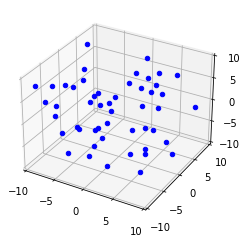

In [3]:
import matplotlib.pyplot as plt
import numpy as np

class Particle:
    def __init__(self, position, radius, velocity):
        self.position = position
        self.radius = radius
        self.velocity = velocity

def detect_collision(p1, p2):
    dist = np.linalg.norm(p1.position - p2.position)
    return dist <= p1.radius + p2.radius

def handle_collision(p1, p2):
    # Calculate the new velocities after collision (assuming perfectly elastic collision)
    v1, v2 = p1.velocity, p2.velocity
    m1, m2 = p1.radius**3, p2.radius**3  # Assume equal densities for simplicity
    v1_new = v1 - 2 * m2 / (m1 + m2) * np.dot(v1 - v2, p1.position - p2.position) / np.linalg.norm(p1.position - p2.position)**2 * (p1.position - p2.position)
    v2_new = v2 - 2 * m1 / (m1 + m2) * np.dot(v2 - v1, p2.position - p1.position) / np.linalg.norm(p2.position - p1.position)**2 * (p2.position - p1.position)
    p1.velocity, p2.velocity = v1_new, v2_new

def main():
    # Simulation parameters
    num_particles = 50
    container_radius = 10
    particle_radius = 0.5
    max_velocity = 2

    particles = []
    for _ in range(num_particles):
        position = np.array([np.random.uniform(-container_radius, container_radius) for _ in range(3)])
        velocity = np.array([np.random.uniform(-max_velocity, max_velocity) for _ in range(3)])
        particles.append(Particle(position, particle_radius, velocity))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-container_radius, container_radius)
    ax.set_ylim(-container_radius, container_radius)
    ax.set_zlim(-container_radius, container_radius)

    for particle in particles:
        ax.scatter(*particle.position, color='b', s=20)

    dt = 0.01  # Time step
    num_steps = 500
    for step in range(num_steps):
        for particle in particles:
            # Update particle positions
            particle.position += particle.velocity * dt

            # Handle collisions with container walls
            for i in range(3):
                if abs(particle.position[i]) >= container_radius - particle.radius:
                    particle.velocity[i] *= -1

        # Handle collisions between particles
        for i in range(num_particles):
            for j in range(i + 1, num_particles):
                if detect_collision(particles[i], particles[j]):
                    handle_collision(particles[i], particles[j])

        # Update visualization
        ax.cla()
        ax.set_xlim(-container_radius, container_radius)
        ax.set_ylim(-container_radius, container_radius)
        ax.set_zlim(-container_radius, container_radius)
        for particle in particles:
            ax.scatter(*particle.position, color='b', s=20)

        plt.pause(0.01)

if __name__ == "__main__":
    main()

    

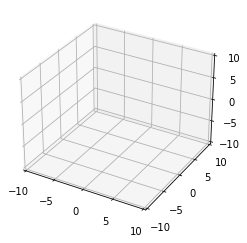

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

class Particle:
    def __init__(self, position, radius, velocity):
        self.position = position
        self.radius = radius
        self.velocity = velocity

def detect_collision(p1, p2):
    dist = np.linalg.norm(p1.position - p2.position)
    return dist <= p1.radius + p2.radius

def handle_collision(p1, p2):
    # Calculate the new velocities after collision (assuming perfectly elastic collision)
    v1, v2 = p1.velocity, p2.velocity
    m1, m2 = p1.radius**3, p2.radius**3  # Assume equal densities for simplicity
    v1_new = v1 - 2 * m2 / (m1 + m2) * np.dot(v1 - v2, p1.position - p2.position) / np.linalg.norm(p1.position - p2.position)**2 * (p1.position - p2.position)
    v2_new = v2 - 2 * m1 / (m1 + m2) * np.dot(v2 - v1, p2.position - p1.position) / np.linalg.norm(p2.position - p1.position)**2 * (p2.position - p1.position)
    p1.velocity, p2.velocity = v1_new, v2_new

def update(frame_number, particles, ax, dt, container_radius):
    for particle in particles:
        # Update particle positions
        particle.position += particle.velocity * dt

        # Handle collisions with container walls
        for i in range(3):
            if abs(particle.position[i]) >= container_radius - particle.radius:
                particle.velocity[i] *= -1

    # Handle collisions between particles
    for i in range(len(particles)):
        for j in range(i + 1, len(particles)):
            if detect_collision(particles[i], particles[j]):
                handle_collision(particles[i], particles[j])

    # Update particle positions in the plot
    ax.cla()
    ax.set_xlim(-container_radius, container_radius)
    ax.set_ylim(-container_radius, container_radius)
    ax.set_zlim(-container_radius, container_radius)
    for particle in particles:
        ax.scatter(*particle.position, color='b', s=20)

if __name__ == "__main__":
    # Simulation parameters
    num_particles = 50
    container_radius = 10
    particle_radius = 0.5
    max_velocity = 2
    dt = 0.01  # Time step

    particles = []
    for _ in range(num_particles):
        position = np.array([np.random.uniform(-container_radius, container_radius) for _ in range(3)])
        velocity = np.array([np.random.uniform(-max_velocity, max_velocity) for _ in range(3)])
        particles.append(Particle(position, particle_radius, velocity))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-container_radius, container_radius)
    ax.set_ylim(-container_radius, container_radius)
    ax.set_zlim(-container_radius, container_radius)

    # Create the animation
    animation = FuncAnimation(fig, update, fargs=(particles, ax, dt, container_radius), interval=10)

    plt.show()
